<a href="https://colab.research.google.com/github/MehediNoor911/NumPy/blob/main/ID_2030921_Md_Mehedi_Hasan_Lab_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Find the following integral using the simpson's 1/3 rule**

Simpson's 1/3 rule uses higher-order polynomials to approximate the integral of a function $f(x)$ over the interval $[a,b]$. For Example, if there is an extra point midway between $f(a)$ and $f(b)$, the three points can be connected with a parabola. The area under the parabola is an approximation of the integral of $f(x)$ over the interval $[a,b]$.

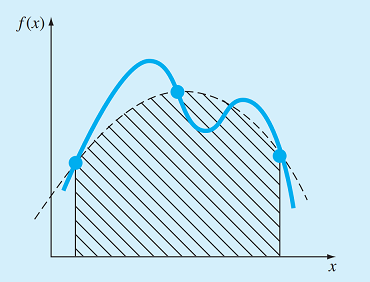

If we are given values of $f(x)$ at 3 points as $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ then we can estimate $f(x)$ using the Lagrange polynomial of degree 2:

$$
\begin{align*}
f(x) &\approx f(x_0) \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{align*}
$$

Now, as the area under the estimated curve is an approximation of the integral of $f(x)$ over the interval $[a,b]$, we can write the integral as:

$$
\begin{align*}
I &= \int_{a}^{b} f(x) dx \\
&\approx \int_{a}^{b} \left[f(x_0)\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} \right] dx
\end{align*}
$$

When $a = x_0$, $b = x_2$, $x_1 = \frac{a+b}{2}$, and $h = \frac{b-a}{2}$, we can simplify the integral to:

$$
\begin{align*}
    I &\approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + f(x_2) \right] \\
    &= (b-a) \frac{f(x_0) + 4f(x_1) + f(x_2)}{6}
\end{align*}
$$

We will use Simpson's 1/3 rule to approximate the integral of $f(x) = 0.2 + 25x - P^3 x^2 + Q^3 x^3 - 100Rx^4 + 400x^5$, where, PQR are last 3 digits of your roll number, over the interval $[0, 0.8]$. Follow the steps below to approximate the integral using Simpson's 1/3 rule.

##### **Step 1: Define the function**

Define a function `f` that takes a single parameter `x` and returns the value of $f(x) = 0.2 + 25x - P^3 x^2 + Q^3 x^3 - 100Rx^4 + 400x^5$ at `x`. Note that the function should be able to handle both scalar and vector inputs.


In [ ]:
import numpy as np


In [ ]:
# Write appropriate code
def f(x, P=1, Q=1, R=1):
    return 0.2 + 25*x - P**3*x**2 + Q**3*x**3 - 100*R*x**4 + 400*x**5


In [ ]:
result_scalar = f(5)
print("Result for scalar input:", result_scalar)

Result for scalar input: 1187725.2


In [ ]:
vector_input = np.array([1, 2, 3, 4, 5])
result_vector = f(vector_input)
print(f"Result for vector input: {result_vector}" )

Result for vector input: [3.2520000e+02 1.1254200e+04 8.9193200e+04 3.8414820e+05 1.1877252e+06]


##### **Step 2: Define a function to approximate the function $f(x)$ using Lagrange polynomial**

Define a function `lagrange` that takes four parameters `x0`, `x1`, `x2` and `x` and returns the value of the Lagrange polynomial of degree 2 at `x`. The function should be able to handle both scalar and vector inputs. Use the function `f` defined in Step 1 to evaluate the function at the given points.

In [ ]:
# write appropriate code
def lagrange(x, x0=0, x1=1, x2=2, x3=3):
    L0 = ((x - x1)*(x - x2)*(x - x3))/((x0 - x1)*(x0 - x2)*(x0 - x3))
    L1 = ((x - x0)*(x - x2)*(x - x3))/((x1 - x0)*(x1 - x2)*(x1 - x3))
    L2 = ((x - x0)*(x - x1)*(x - x3))/((x2 - x0)*(x2 - x1)*(x2 - x3))
    L3 = ((x - x0)*(x - x1)*(x - x2))/((x3 - x0)*(x3 - x1)*(x3 - x2))

    return f(x0)*L0 + f(x1)*L1 + f(x2)*L2 + f(x3)*L3

In [ ]:
result_scalar = lagrange(2, 0, 1, 3, 4)
print(f"Result for scalar input: {result_scalar}")

Result for scalar input: -4345.799999999996


In [ ]:
vector_input = np.array([1, 2, 3, 4, 5])
result_vector = lagrange(vector_input)
print(f"Result for vector input: {result_vector}")

Result for vector input: [3.252000e+02 1.125420e+04 8.919320e+04 2.905482e+05 6.717252e+05]


##### **Step 3: Define the interval**
Define the interval as a numpy array of two elements, where the first element is the lower bound and the second element is the upper bound. Name the array `interval`.

In [ ]:
# Write appropriate code
def create_interval(lower_bound, upper_bound):
  return np.array([lower_bound, upper_bound])


In [ ]:
lower_bound = -3
upper_bound = 4
interval = create_interval(lower_bound, upper_bound)
print(f"interval: {interval}")

interval: [-3  4]


In [ ]:
# random_points = np.random.uniform(interval[0], interval[1], size=3)
# print(random_points)

##### **Step 4: Plot the function and the approximated polynomial**

Plot the function $f(x)$ and the approximated polynomial using the function `lagrange` defined in Step 2. Use the interval defined in Step 3 as the x-axis. Also, plot the points $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ on the same plot. Fill the area under the approximated polynomial using numpy's `fill_between` function.

In [ ]:
import matplotlib.pyplot as plt

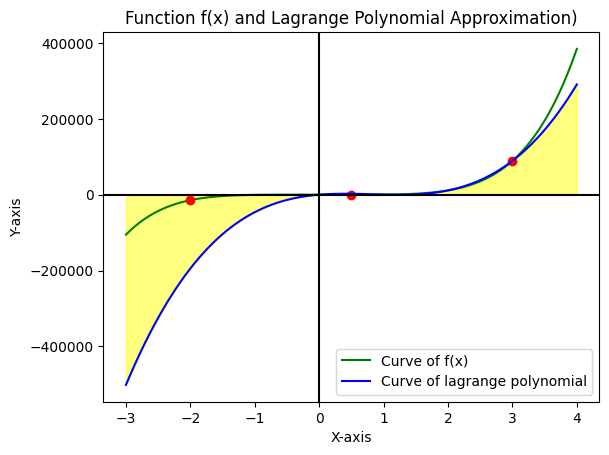

In [ ]:
# Write appropriate code
x_values = np.linspace(interval[0], interval[1], 100)
f_values = f(x_values)
lagrange_values = lagrange(x_values)
sub_intervals = np.linspace(-2, 3, 3)
plt.plot(x_values, f_values, "g", label = 'Curve of f(x)')
plt.plot(sub_intervals, f(sub_intervals), "ro")
plt.plot(x_values, lagrange_values, "b", label = 'Curve of lagrange polynomial')
plt.fill_between(x_values, lagrange_values, color='yellow', alpha=0.5)
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Function f(x) and Lagrange Polynomial Approximation)')
plt.legend()
plt.show()

##### **Step 5: Define a function to approximate the integral using Simpson's 1/3 rule**

Define a function `simpson` that takes a parameter `interval` and returns the approximate value of the integral of $f(x)$ over the interval `interval` using Simpson's 1/3 rule. You have to employ the following steps:

*   Calculate the midpoint of the interval. Store the value in a variable named `midpoint`.
*   Calculate the value of $f(x_0)$, $f(x_1)$, and $f(x_2)$, where $x_0 = a$, $x_1 = \frac{a+b}{2} = midpoint$, and $x_2 = b$. Store the values in variables named `f0`, `f1`, and `f2` respectively.
*   Calculate the approximate value of the integral using Simpson's 1/3 rule. Store the value in a variable named `I`.
*   Return the value of `I`.

In [ ]:
# Write appropriate code
def simpson(interval):
    midpoint = (interval[0] + interval[1]) / 2
    f0 = f(interval[0])
    f1 = f(midpoint)
    f2 = f(interval[1])
    I = (interval[1] - interval[0]) * (f0 + 4*f1 + f2) / 6
    return I


In [ ]:
approx_integral = simpson(interval)
print(f"Approximate value of the integral: {approx_integral}" )

Approximate value of the integral: 325281.48333333334


##### **Step 6: Approximate the integral using Simpson's 1/3 rule**

Call the function `simpson` with the interval `interval` as the parameter. Store the value returned by the function in a variable named `I`. Print the value of `I`. Then you should compute the integral analytically and find the absolute relative error between the two values. Print the absolute relative error.

In [ ]:
# Write appropriate code
def F(x, P=1, Q=1, R=1):
    return 0.2*x + (25/2)*x**2 - (P**3/3)*x**3 + (Q**3/4)*x**4 - (100*R/5)*x**5 + (400/6)*x**6

In [ ]:
analytical_integral = F(interval[1]) - F(interval[0])
absolute_relative_error = np.abs((approx_integral - analytical_integral) / analytical_integral)

In [ ]:
print("Analytical value of the integral:", analytical_integral)
print("Absolute relative error:", absolute_relative_error)

Analytical value of the integral: 199228.98333333337
Absolute relative error: 0.6327016174604445
